<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/boundary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.3 문제 2.1에서 Training Data를 다르게 사용하여 즉 학습데이터 N=1000개에 대하여 (1) Random으로 1000개 생성하여 사용한경우 (2) Random으로 500개와 경계선에 500개 사용한 경우 (3) 경계선만 1000개를 각각 학습데이터로 사용하여 나머지 4000개 Test데이터에 대하여 Accuracy를 비교하고 Code를 제시하시오.(20 점) 
    즉 동일한 1000개의 학습데이터를 사용하지만 구성이 다른경우에 대하여 일반화 능력을 비교하는 문제임

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf

In [10]:
from random import *
x1 = []
x2 = []
x3 = []
x4 = []
for i in range(1000):
  x1.append(uniform(0.4, 0.6))
  x2.append(uniform(0, 1))
  a1 = uniform(0, 1)
  a2 = uniform(0.4, 0.6)
  if a1 >= 0.4 and a1 < 0.6:
    continue
  else:
    x3.append(a1)
    x4.append(a2)
x1 = np.array(x1 + x3)
x2 = np.array(x2 + x4)

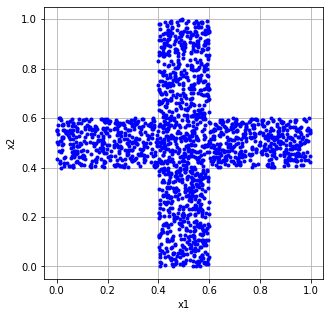

In [11]:
plt.figure(figsize=(5, 5))
plt.plot(x1, x2, 'b.')
# plt.plot(x3, x4, 'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [12]:
def classify_data(x1, x2):
    target = []
    for i in range(len(x1)):
        if x1[i] < 0.5 and x2[i] < 0.5:
            target.append('type1')
        elif x1[i] >= 0.5 and x2[i] < 0.5:
            target.append('type2')
        elif x1[i] < 0.5 and x2[i] >= 0.5:
            target.append('type3')
        elif x1[i] >= 0.5 and x2[i] >= 0.5:
            target.append('type4')
    return np.array(target)

In [13]:
target = classify_data(x1, x2)
print(target[0 : 10])

['type1' 'type4' 'type3' 'type4' 'type2' 'type4' 'type4' 'type3' 'type3'
 'type1']


In [14]:
print(len(target[target == 'type1']))
print(len(target[target == 'type2']))
print(len(target[target == 'type3']))
print(len(target[target == 'type4']))

430
485
449
449


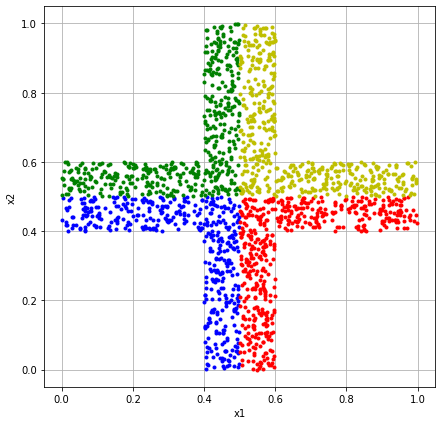

In [15]:
plt.figure(figsize=(7, 7))
plt.plot(x1[target == 'type1'], x2[target == 'type1'], 'b.')
plt.plot(x1[target == 'type2'], x2[target == 'type2'], 'r.')
plt.plot(x1[target == 'type3'], x2[target == 'type3'], 'g.')
plt.plot(x1[target == 'type4'], x2[target == 'type4'], 'y.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

데이터 합치기

In [16]:
def merge_data(x1, x2):
    ret = []
    for i in range(len(x1)):
        ret.append([x1[i], x2[i]])
    return np.array(ret)

In [17]:
data = merge_data(x1, x2)
data[0 : 5]

array([[0.40236316, 0.12109266],
       [0.53107941, 0.80298257],
       [0.47722597, 0.75871993],
       [0.53113475, 0.7179072 ],
       [0.52747831, 0.30994317]])

In [18]:
encoder = LabelBinarizer()
print(target[0 : 10])

# binary로 바꿈, 본인이 필요시 만들어도 됨
target = encoder.fit_transform(target)

print(target[0 : 10])
print(encoder.classes_)

['type1' 'type4' 'type3' 'type4' 'type2' 'type4' 'type4' 'type3' 'type3'
 'type1']
[[1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]]
['type1' 'type2' 'type3' 'type4']


In [19]:
trn=700
x_train = data[0 : trn]
t_train = target[0 : trn]

#101부터 1000까지 test함
x_test = data[trn : ]
t_test = target[trn : ]

In [20]:
from keras import optimizers
# optimizer = running rate 다르게
# running rate는 가중치 변화량에대한 변수임임

In [24]:
model1 = Sequential()

# 입력이 2개 activation: signoid 16개, hidden layer 2개 
model1.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
model1.add(Dense(16, activation = 'sigmoid' ))
model1.add(Dense(4, activation = 'softmax'))

# model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
# model1.compile(optimizer = optimizers.Adam(lr = 0.001), loss = 'mean_squared_error')

#running rate가 클 경우에는 빠르게 accracy가 증가하지만 오실레이션이 증가할 수 있음
#적당한 크기로 하는 것이 좋음#running rate가 클 경우에는 빠르게 accracy가 증가하지만 오실레이션이 증가할 수 있음
#적당한 크기로 하는 것이 좋음

# fit 은 학습을 시키는 것 batch는 몇개마다 학습을 시킬것인가
hist1 = model1.fit(x_train, t_train, epochs = 400, batch_size = 50)


Epoch 1/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.2861
Epoch 2/400
14/14 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.2861
Epoch 3/400
14/14 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.2726
Epoch 4/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.2720
Epoch 5/400
14/14 [==============================] - 0s 1ms/step - loss: 0.1862 - accuracy: 0.2837
Epoch 6/400
14/14 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.2497
Epoch 7/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.2679
Epoch 8/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.2796
Epoch 9/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.2622
Epoch 10/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.2787
Epoch 11/

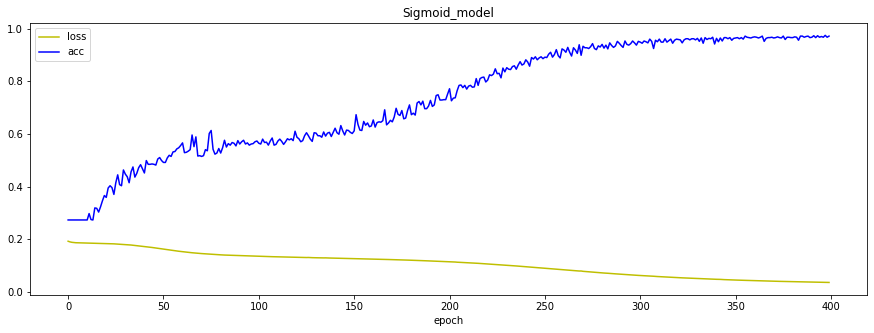

In [25]:
plt.figure(figsize = (15, 5))
plt.plot(hist1.history['loss'], 'y', label = 'loss')
plt.plot(hist1.history['accuracy'], 'b', label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc = 'best')
plt.show()

In [26]:
model1_test_loss_and_metrics = model1.evaluate(x_test, t_test, batch_size = 20)
model1_train_loss_and_metrics = model1.evaluate(x_train, t_train, batch_size = 20)
model1_test_loss_and_metrics
model1_train_loss_and_metrics
print(model1.predict(x_test[[0]]))
print(x_test[0])
print(t_test[0])

35/35 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9700
[[0.00112158 0.00232431 0.19991711 0.796637  ]]
[0.54315207 0.84067877]
[0 0 0 1]


In [31]:
nx1 = np.random.random(400)
nx2 = np.random.random(400)

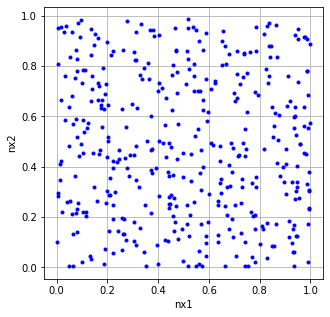

In [32]:
plt.figure(figsize=(5, 5))
plt.plot(nx1, nx2, 'b.')
plt.xlabel('nx1')
plt.ylabel('nx2')
plt.grid(True)
plt.show()

In [33]:
new_data = merge_data(nx1, nx2)

In [34]:
predict_new_data = model1.predict(new_data)

In [39]:
new_target = classify_data(nx1, nx2)

In [43]:
new_target = encoder.fit_transform(new_target)

In [35]:
print(predict_new_data)

[[6.5962422e-06 5.7629002e-03 2.7190332e-04 9.9395859e-01]
 [1.5796904e-03 3.2014254e-06 9.9767405e-01 7.4308488e-04]
 [4.3700245e-05 4.0337938e-01 9.9628660e-06 5.9656698e-01]
 ...
 [9.4086325e-01 4.5981459e-04 5.8658578e-02 1.8326924e-05]
 [2.6231339e-05 2.6162288e-01 1.1612987e-05 7.3833930e-01]
 [9.8365778e-01 7.0306426e-03 9.2294021e-03 8.2181250e-05]]


In [37]:
a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []
c1 = []
c2 = []
c3 = []
d1 = []
d2 = []
d3 = []

for i in range(len(nx1)):
  if np.argmax(predict_new_data[i])== 0:
    a1.append(new_data[i,0])
    a2.append(new_data[i,1])
  if np.argmax(predict_new_data[i])== 1:
    b1.append(new_data[i,0])
    b2.append(new_data[i,1])
  if np.argmax(predict_new_data[i])== 2:
    c1.append(new_data[i,0])
    c2.append(new_data[i,1])
  if np.argmax(predict_new_data[i])== 3:
    d1.append(new_data[i,0])
    d2.append(new_data[i,1])

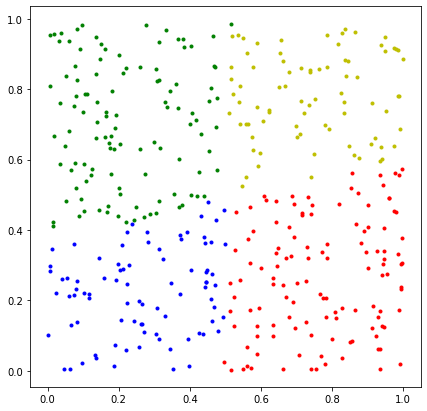

In [38]:
plt.figure(figsize=(7, 7))
plt.plot(a1, a2, 'b.')
plt.plot(b1, b2, 'r.')
plt.plot(c1, c2, 'g.')
plt.plot(d1, d2, 'y.')

In [46]:
model1_train_loss_and_metrics = model1.evaluate(new_data, new_target, batch_size = 10)


40/40 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9225
